In [3]:
#Imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [4]:
from sklearn.tree import DecisionTreeClassifier

<ErrorbarContainer object of 3 artists>

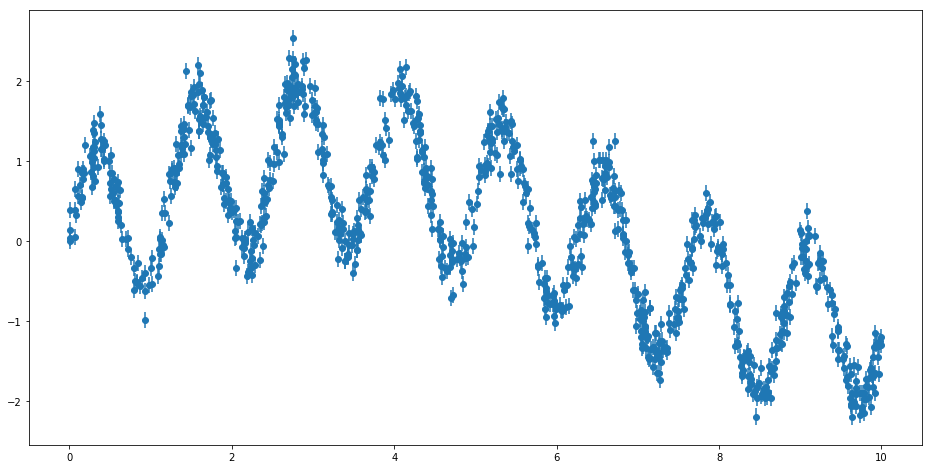

In [5]:
from sklearn.ensemble import RandomForestRegressor

x = 10 * np.random.rand(1000)

def sin_model(x, sigma=0.2):
    '''
    Generate random sinusoidal data for regression analysis. Does SciKit-Learn have this?
    '''
   
    noise = sigma * np.random.randn(len(x))

    return np.sin(5 * x) + np.sin(0.5 * x) + noise

# Call y for data with x
y = sin_model(x)

# Plot x vs y
plt.figure(figsize=(16,8))
plt.errorbar(x, y, 0.1, fmt='o')

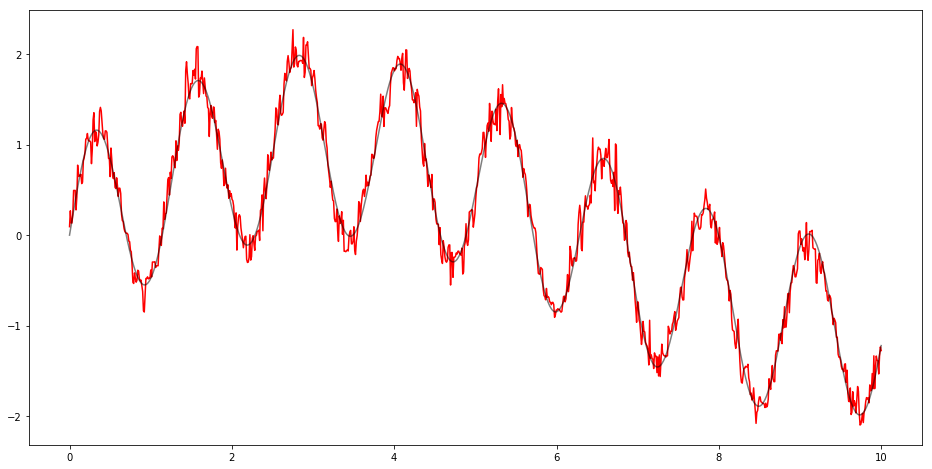

In [6]:
# X points
xfit = np.linspace(0, 10, 1000)

# Model
rfr = RandomForestRegressor(100)

# Fit Model (Format array for y with [:,None])
rfr.fit(x[:, None], y)

# Set predicted points
yfit = rfr.predict(xfit[:, None])

# Set real poitns (the model function)
ytrue = sin_model(xfit, 0)

# Plot 
plt.figure(figsize=(16,8))
#plt.errorbar(x, y, 0.1, fmt='o')

plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

In [7]:
import os

In [8]:
os.chdir('C:/Users/f8026379/Documents/MANP/1.Alteryx Projects/Capacity Dimensioning/W30_2019')


In [9]:
base=pd.read_excel('Report.xlsx',sheet_name='Base')

In [10]:
b10m=base[base['Layer'].isin(['700'])&base['Volume']>0]

In [11]:
vol=np.array(b10m.Volume)


In [12]:
u_thp=np.array(b10m.User_Thp)


In [13]:
net=np.array(b10m.RRCa)

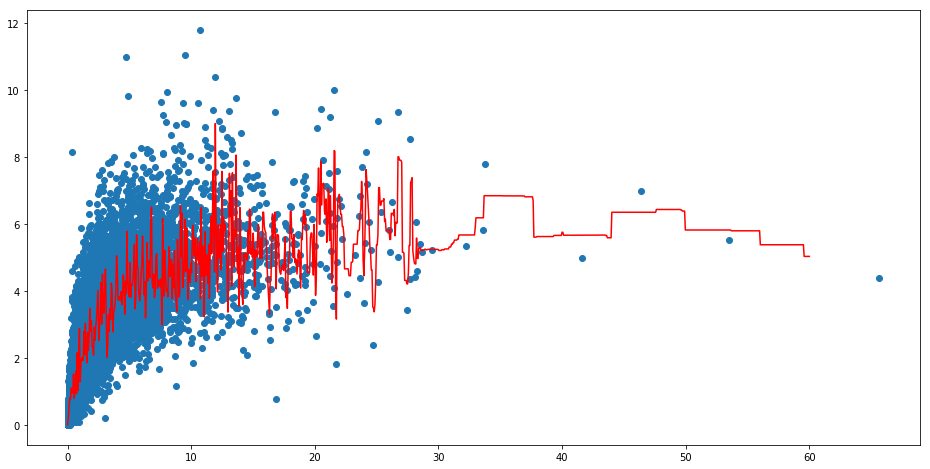

In [14]:
# X points
xfit = np.linspace(0, 60, 1000)

# Model
rfr = RandomForestRegressor(100)

# Fit Model (Format array for y with [:,None])
rfr.fit(net[:, None], vol)

# Set predicted points
vol_fit = rfr.predict(xfit[:, None])

# Set real poitns (the model function)
#ytrue = sin_model(xfit, 0)

# Plot 
plt.figure(figsize=(16,8))
#plt.errorbar(vol, u_thp, 0.1, fmt='o',alpha=0.5)

plt.scatter(net,vol/1024/1024)
plt.plot(xfit, vol_fit/1024/1024, '-r');
#plt.plot(xfit, u_thp, '-k', alpha=0.5);

(0, 60)

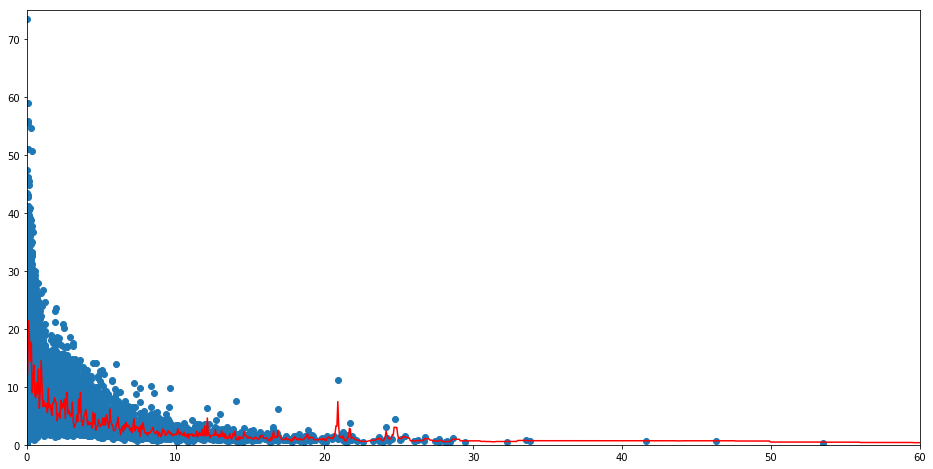

In [15]:
# X points
lim=60
xfit = np.linspace(0, lim, 1000)

# Model
rfr = RandomForestRegressor(100)

# Fit Model (Format array for y with [:,None])
rfr.fit(net[:, None], u_thp)

# Set predicted points
utp_fit = rfr.predict(xfit[:, None])

# Set real poitns (the model function)
#ytrue = sin_model(xfit, 0)

# Plot 
plt.figure(figsize=(16,8))
#plt.errorbar(vol, u_thp, 0.1, fmt='o',alpha=0.5)

plt.scatter(net,u_thp/1000)
plt.plot(xfit, utp_fit/1000, '-r');
plt.ylim(0,75)
plt.xlim(0,lim)


In [16]:
util=np.array(b10m.Utilization)

(0, 1)

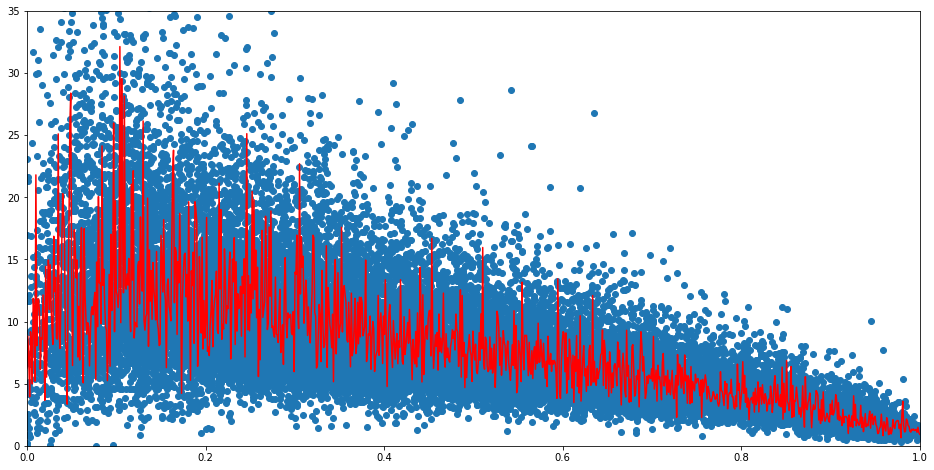

In [17]:
# X points
ufit = np.linspace(0, 1, 1000)

# Model
rfr = RandomForestRegressor(100)

# Fit Model (Format array for y with [:,None])
rfr.fit(util[:, None], u_thp)

# Set predicted points
yfit = rfr.predict(ufit[:, None])

# Set real poitns (the model function)
#ytrue = sin_model(xfit, 0)

# Plot 
plt.figure(figsize=(16,8))
#plt.errorbar(vol, u_thp, 0.1, fmt='o',alpha=0.5)

plt.scatter(util,u_thp/1000)
plt.plot(ufit, yfit/1000, '-r');
plt.ylim(0,35)
plt.xlim(0,1)
#plt.plot(xfit, u_thp, '-k', alpha=0.5);

In [18]:
os.chdir('C:/Users/f8026379/Documents/MANP/Erato')

In [19]:
df_5M=pd.read_excel('Performances LTE - MIMO2x2 TM4 64QAM - 2 PDCCH_LTE_Perf_Curve.xls',sheet_name='AF=0.7_5 MHz_volume')
df_10M=pd.read_excel('Performances LTE - MIMO2x2 TM4 64QAM - 2 PDCCH_LTE_Perf_Curve.xls',sheet_name='AF=0.7_10 MHz_volume')
df_15M=pd.read_excel('Performances LTE - MIMO2x2 TM4 64QAM - 2 PDCCH_LTE_Perf_Curve.xls',sheet_name='AF=0.7_15 MHz_volume')
df_20M=pd.read_excel('Performances LTE - MIMO2x2 TM4 64QAM - 2 PDCCH_LTE_Perf_Curve.xls',sheet_name='AF=0.7_20 MHz_volume')

In [20]:
df_5M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
VoLTE Traffic [Erlang]    50 non-null int64
Traffic [Erlang]          50 non-null float64
Average Throughput        50 non-null float64
Loss                      50 non-null float64
1st Flow Throughput       50 non-null float64
2nd Flow Throughput       50 non-null float64
Cell Throughput           50 non-null float64
Volume GB                 50 non-null float64
dtypes: float64(7), int64(1)
memory usage: 3.2 KB


In [21]:
erl_5M=np.array(df_5M['Traffic [Erlang]'])
erl_10M=np.array(df_10M['Traffic [Erlang]'])
erl_15M=np.array(df_15M['Traffic [Erlang]'])
erl_20M=np.array(df_20M['Traffic [Erlang]'])
utp_5M=np.array(df_5M['Average Throughput'])
utp_10M=np.array(df_10M['Avg User Thp [Kbps]'])
utp_15M=np.array(df_15M['Average Throughput'])
utp_20M=np.array(df_20M['Average Throughput'])
vol_5M=np.array(df_5M['Cell Throughput'])
vol_10M=np.array(df_10M['Cell Throughput'])
vol_15M=np.array(df_15M['Cell Throughput'])
vol_20M=np.array(df_20M['Cell Throughput'])


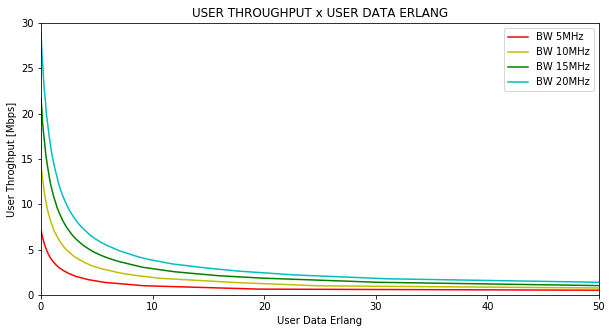

In [22]:
plt.figure(figsize=(10,5))
plt.plot(erl_5M, utp_5M/1000, '-r');
plt.plot(erl_10M, utp_10M/1000, '-y');
plt.plot(erl_15M, utp_15M/1000, '-g');
plt.plot(erl_20M, utp_20M/1000, '-c');
plt.ylabel('User Throghput [Mbps]')
plt.xlabel('User Data Erlang')
plt.xlim(-0,50)
plt.ylim(0,30)
plt.title('USER THROUGHPUT x USER DATA ERLANG')
plt.legend(['BW 5MHz','BW 10MHz','BW 15MHz','BW 20MHz'])
plt.savefig("User_Thp x Net.png")

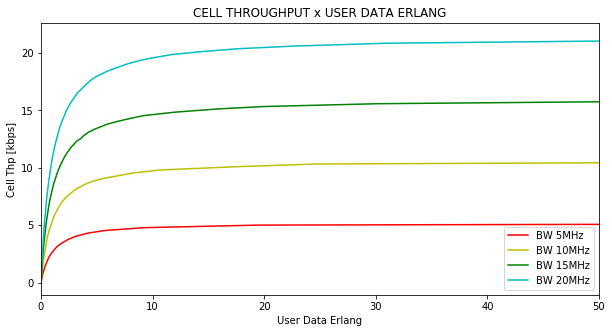

In [23]:
plt.figure(figsize=(10,5))
plt.plot(erl_5M, vol_5M/1000, '-r');
plt.plot(erl_10M, vol_10M/1000, '-y');
plt.plot(erl_15M, vol_15M/1000, '-g');
plt.plot(erl_20M, vol_20M/1000, '-c');
plt.ylabel('Cell Thp [kbps]')
plt.xlabel('User Data Erlang')
plt.xlim(-0,50)
plt.legend(['BW 5MHz','BW 10MHz','BW 15MHz','BW 20MHz'])
plt.title('CELL THROUGHPUT x USER DATA ERLANG')
plt.savefig("Cell_Thp x Net.png")

#plt.ylim(0,25)



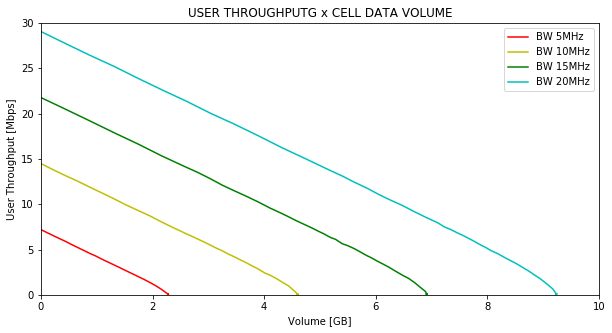

In [24]:
plt.figure(figsize=(10,5))
plt.plot( vol_5M*3600/8/1024/1024,utp_5M/1000, '-r');
plt.plot( vol_10M*3600/8/1024/1024,utp_10M/1000, '-y');
plt.plot(vol_15M*3600/8/1024/1024,utp_15M/1000,  '-g');
plt.plot( vol_20M*3600/8/1024/1024,utp_20M/1000, '-c');
plt.ylabel('User Throughput [Mbps]')
plt.xlabel('Volume [GB]')
plt.xlim(0,10)
plt.ylim(0,30)
plt.legend(['BW 5MHz','BW 10MHz','BW 15MHz','BW 20MHz'])
plt.title('USER THROUGHPUTG x CELL DATA VOLUME')
plt.savefig("Volume x User Thp.png")

#plt.ylim(0,25)

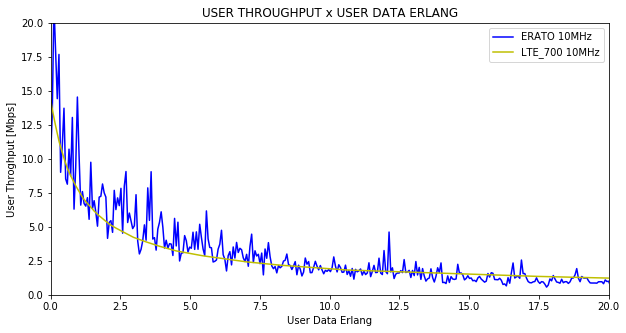

In [25]:
plt.figure(figsize=(10,5))
plt.plot(xfit, utp_fit/1000, '-b');
#plt.plot(erl_5M, utp_5M/1000, '-r');
plt.plot(erl_10M, utp_10M/1000, '-y');
#plt.plot(erl_15M, utp_15M/1000, '-g');
#plt.plot(erl_20M, utp_20M/1000, '-c');
plt.ylabel('User Throghput [Mbps]')
plt.xlabel('User Data Erlang')
plt.xlim(0,20)
plt.ylim(0,20)
plt.title('USER THROUGHPUT x USER DATA ERLANG')
plt.legend(['ERATO 10MHz','LTE_700 10MHz'])
plt.savefig("L700 User_Thp x Net.png")

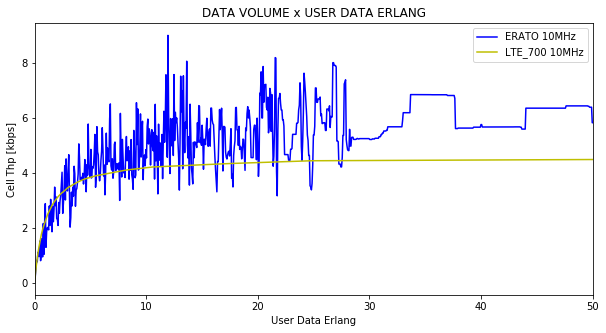

In [26]:
plt.figure(figsize=(10,5))
plt.plot(xfit, vol_fit/1024/1024, '-b');
#plt.plot(erl_5M, vol_5M/1000, '-r');
plt.plot(erl_10M, vol_10M*3600/8/1024/1024, '-y');
#plt.plot(erl_15M, vol_15M/1000, '-g');
#plt.plot(erl_20M, vol_20M/1000, '-c');
plt.ylabel('Cell Thp [kbps]')
plt.xlabel('User Data Erlang')
plt.xlim(-0,50)
plt.legend(['ERATO 10MHz','LTE_700 10MHz'])
plt.title('DATA VOLUME x USER DATA ERLANG')
plt.savefig("L700 Data Volume x Net.png")

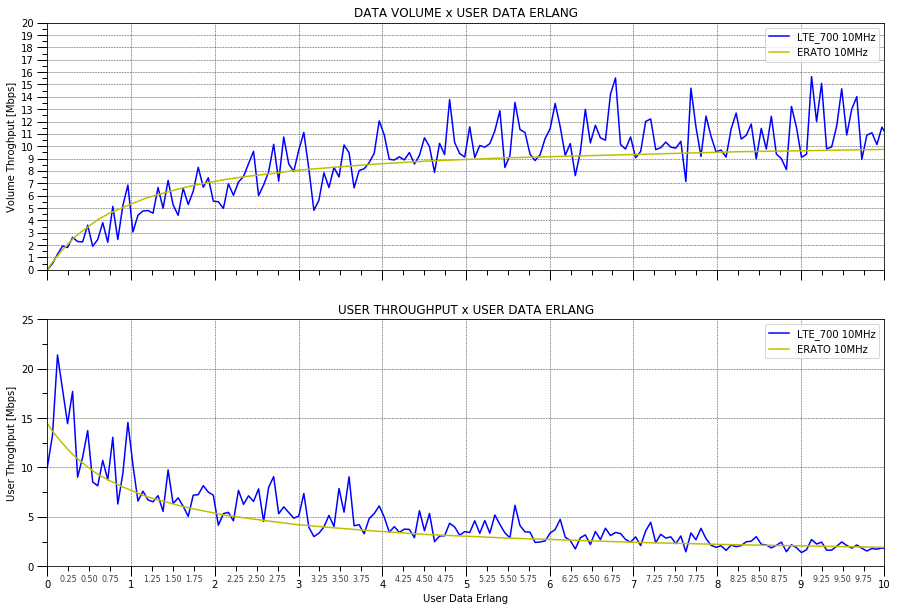

In [27]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(15,10),sharex=True,)

ax1.tick_params(which='major', width=1.0)
ax1.tick_params(which='major', length=10)
ax1.tick_params(which='minor', width=1.0, labelsize=10)
ax1.tick_params(which='minor', length=5, labelsize=8, labelcolor='0.25')

ax1.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax1.xaxis.set_major_locator(MultipleLocator(1.000))
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_major_locator(MultipleLocator(1.000))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
#ax1.xaxis.set_minor_formatter(FuncFormatter(minor_tick))
#ax1.yaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax1.plot(xfit, vol_fit/439.45/1000, '-b',label='LTE_700 10MHz');
ax1.plot(erl_10M, vol_10M/1000, '-y',label='ERATO 10MHz');
ax1.set_ylabel('Volume Throghput [Mbps]')
#ax1.set_xlabel('User Data Erlang')
ax1.set_xlim(0,10)
ax1.set_ylim(0,20)
ax1.set_title('DATA VOLUME x USER DATA ERLANG')
ax1.legend()

ax2.tick_params(which='major', width=1.0)
ax2.tick_params(which='major', length=10)
ax2.tick_params(which='minor', width=1.0, labelsize=10)
ax2.tick_params(which='minor', length=5, labelsize=8, labelcolor='0.25')

ax2.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax2.xaxis.set_major_locator(MultipleLocator(1.000))
ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
ax2.yaxis.set_major_locator(MultipleLocator(5.000))
ax2.yaxis.set_minor_locator(AutoMinorLocator(2))
ax2.xaxis.set_minor_formatter(FuncFormatter(minor_tick))
#ax2.yaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax2.plot(xfit, utp_fit/1000, '-b',label='LTE_700 10MHz');
ax2.plot(erl_10M, utp_10M/1000, '-y',label='ERATO 10MHz');
ax2.set_ylabel('User Throghput [Mbps]')
ax2.set_xlabel('User Data Erlang')
ax2.set_ylim(0,25)
ax2.set_xlim(0,10)
ax2.set_title('USER THROUGHPUT x USER DATA ERLANG')
ax2.legend()

plt.savefig("ERATO x LTE700.png")

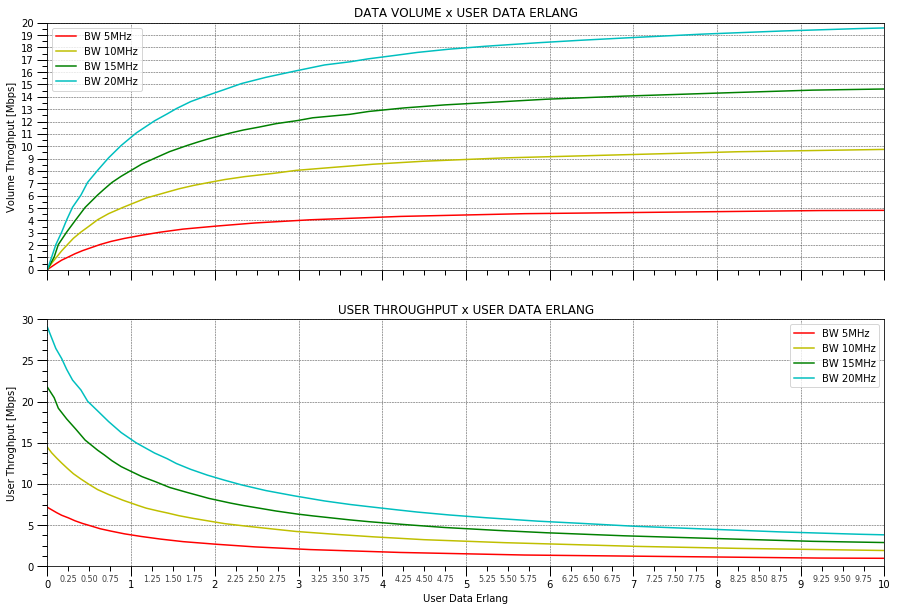

In [28]:
def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(15,10),sharex=True,)

ax1.tick_params(which='major', width=1.0)
ax1.tick_params(which='major', length=10)
ax1.tick_params(which='minor', width=1.0, labelsize=10)
ax1.tick_params(which='minor', length=5, labelsize=8, labelcolor='0.25')

ax1.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax1.xaxis.set_major_locator(MultipleLocator(1.000))
ax1.xaxis.set_minor_locator(AutoMinorLocator(1))
ax1.yaxis.set_major_locator(MultipleLocator(1.000))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
#ax1.xaxis.set_minor_formatter(FuncFormatter(minor_tick))
#ax1.yaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax1.plot(erl_5M, vol_5M/1000, '-r');
ax1.plot(erl_10M, vol_10M/1000, '-y');
ax1.plot(erl_15M, vol_15M/1000, '-g');
ax1.plot(erl_20M, vol_20M/1000, '-c');
ax1.set_ylabel('Volume Throghput [Mbps]')
#ax1.set_xlabel('User Data Erlang')
ax1.set_ylim(0,20)
ax1.set_xlim(0,30)
ax1.legend(['BW 5MHz','BW 10MHz','BW 15MHz','BW 20MHz'])
ax1.set_title('DATA VOLUME x USER DATA ERLANG')

ax2.tick_params(which='major', width=1.0)
ax2.tick_params(which='major', length=10)
ax2.tick_params(which='minor', width=1.0, labelsize=10)
ax2.tick_params(which='minor', length=5, labelsize=8, labelcolor='0.25')

ax2.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax2.xaxis.set_major_locator(MultipleLocator(1.000))
ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
ax2.yaxis.set_major_locator(MultipleLocator(5.000))
ax2.yaxis.set_minor_locator(AutoMinorLocator(4))
ax2.xaxis.set_minor_formatter(FuncFormatter(minor_tick))
#ax2.yaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax2.plot(erl_5M, utp_5M/1000, '-r');
ax2.plot(erl_10M, utp_10M/1000, '-y');
ax2.plot(erl_15M, utp_15M/1000, '-g');
ax2.plot(erl_20M, utp_20M/1000, '-c');
ax2.set_ylabel('User Throghput [Mbps]')
ax2.set_xlabel('User Data Erlang')
ax2.set_xlim(0,10)
ax2.set_ylim(0,30)
ax2.set_title('USER THROUGHPUT x USER DATA ERLANG')
ax2.legend(['BW 5MHz','BW 10MHz','BW 15MHz','BW 20MHz'])


plt.savefig("ERATO LTE CURVES.png")

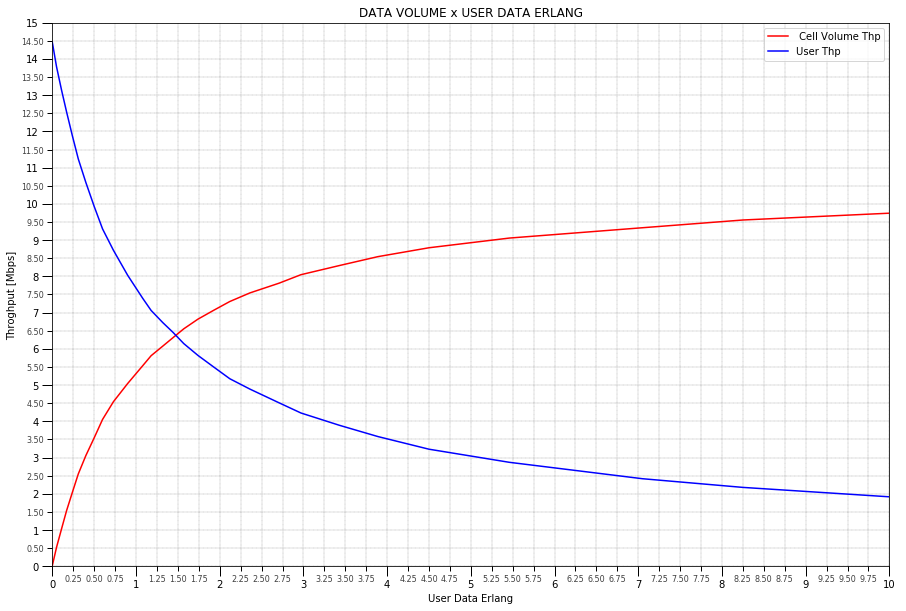

In [29]:
def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

fig, ax1 = plt.subplots(1, 1,figsize=(15,10))

ax1.tick_params(which='major', width=1.0)
ax1.tick_params(which='major', length=10)
ax1.tick_params(which='minor', width=1.0, labelsize=10)
ax1.tick_params(which='minor', length=5, labelsize=8, labelcolor='0.25')

ax1.grid(linestyle="--", linewidth=0.25, color='.25', zorder=-10,which='both')

ax1.xaxis.set_major_locator(MultipleLocator(1.000))
ax1.xaxis.set_minor_locator(AutoMinorLocator(4))
ax1.yaxis.set_major_locator(MultipleLocator(1.000))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
ax1.xaxis.set_minor_formatter(FuncFormatter(minor_tick))
ax1.yaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax1.plot(erl_10M, vol_10M/1000, '-r',label=' Cell Volume Thp');
ax1.plot(erl_10M, utp_10M/1000, '-b',label='User Thp');
ax1.set_ylabel('Throghput [Mbps]')
ax1.set_xlabel('User Data Erlang')
ax1.set_ylim(0,15)
ax1.set_xlim(0,10)
ax1.set_title('DATA VOLUME x USER DATA ERLANG')
ax1.legend()


plt.savefig("ERATO_10MHz.png")